In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

from scipy.optimize import curve_fit as cf

In [10]:
N_samples = 25
x=np.linspace(-2,2,N_samples)

In [11]:
def f(x,a,mu,sigma):
    r=a*np.exp(-(x-mu)**2/(2*sigma**2))
    return (r)

In [12]:
def func(a,mu,sigma,noise):
    r=a*np.exp(-(x-mu)**2/(2*sigma**2))
    plt.plot(x,r)
    r= r+np.random.normal(loc=0,scale=noise,size=N_samples)
    plt.scatter(x,r)
    plt.show()
    return (r)

In [13]:
y=interactive(func,a=(1,5),mu=(-5,5,0.5),sigma=(0,2,0.2),noise=(0,1,0.1))
display(y)

interactive(children=(IntSlider(value=3, description='a', max=5, min=1), FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value=1.0, description='sigma', max=2.0, step=0.2), FloatSlider(value=0.0, description='noise', max=1.0), Output()), _dom_classes=('widget-interact',))

           Original Params  Estimated Params
Amplitude              3.0          3.067208
Mean                   0.5          0.458966
Std.Dev                1.0          0.954288


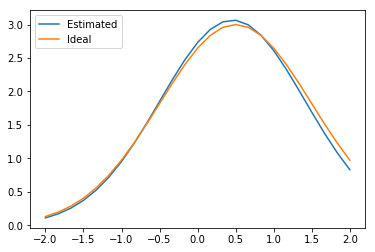

In [17]:
p = y.result
p1,_=cf(f,xdata=x,ydata=p)

par_lst=list(p1)

p2=list(y.kwargs.values())
p2=p2[:-1]

data = np.array([p2,par_lst])

df=pd.DataFrame(data=data.T,index=['Amplitude','Mean','Std.Dev'],columns=['Original Params','Estimated Params'])
print(df)

plt.plot(x,f(x,par_lst[0],par_lst[1],par_lst[2]))
plt.plot(x,f(x,p2[0],p2[1],p2[2]))
plt.legend(['Estimated','Ideal'])
plt.show()